# 텐서플로우 회귀 분석 모델

- 다양한 방법이 존재
- 텐서플로우2만 사용하는 방법, 케라스를 이용한 방법, 둘을 모두 섞은 방법 등등  


## 선형 회귀(Linear Regression)

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [73]:
learning_rate = 0.01
training_steps = 1000

In [74]:
X = np.random.randn(50)
Y = 2*X + np.random.randn(50)

In [75]:
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

def linear_regression(x):
  return W * x + b

def mean_square(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

optimizer = tf.optimizers.SGD(learning_rate)

In [76]:
def run_optimization():
  with tf.GradientTape() as tape:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)

  gradients = tape.gradient(loss, [W, b])

  optimizer.apply_gradients(zip(gradients, [W, b]))

In [77]:
for step in range(1, training_steps):
  run_optimization()

  if step % 50 == 0:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
    print('step: {:4d}\tloss: {:.4f}\tW: {:.4f}\tb: {:.4f}'.format(step, loss, W.numpy(), b.numpy()))

step:   50	loss: 1.5277	W: 1.5205	b: 0.3107
step:  100	loss: 0.9595	W: 1.9889	b: 0.1262
step:  150	loss: 0.9160	W: 2.1141	b: 0.0648
step:  200	loss: 0.9126	W: 2.1474	b: 0.0440
step:  250	loss: 0.9123	W: 2.1562	b: 0.0368
step:  300	loss: 0.9123	W: 2.1585	b: 0.0343
step:  350	loss: 0.9123	W: 2.1591	b: 0.0335
step:  400	loss: 0.9123	W: 2.1592	b: 0.0331
step:  450	loss: 0.9123	W: 2.1592	b: 0.0330
step:  500	loss: 0.9123	W: 2.1592	b: 0.0330
step:  550	loss: 0.9123	W: 2.1592	b: 0.0330
step:  600	loss: 0.9123	W: 2.1592	b: 0.0330
step:  650	loss: 0.9123	W: 2.1592	b: 0.0330
step:  700	loss: 0.9123	W: 2.1592	b: 0.0330
step:  750	loss: 0.9123	W: 2.1592	b: 0.0330
step:  800	loss: 0.9123	W: 2.1592	b: 0.0330
step:  850	loss: 0.9123	W: 2.1592	b: 0.0330
step:  900	loss: 0.9123	W: 2.1592	b: 0.0330
step:  950	loss: 0.9123	W: 2.1592	b: 0.0330


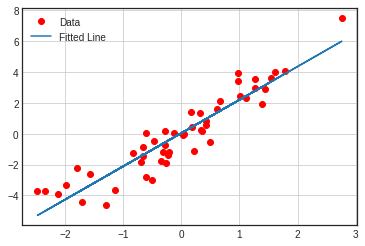

In [78]:
plt.plot(X, Y, 'ro', label='Data')
plt.plot(X, np.array(W * X + b), label='Fitted Line')
plt.legend()
plt.grid()
plt.show()

## 다항 회귀 (Nonlinear Regression)


### modules import

In [79]:
from tensorflow.keras.optimizers import Adam

### Hyper Parameters

In [102]:
epochs = 1000
learning_rate = 0.04

### 변수 지정

In [111]:
a = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
c = tf.Variable(np.random.randn())

In [112]:
print(a.numpy())
print(b.numpy())
print(c.numpy())

-1.1394072
-2.286243
0.36656106


### 데이터 지정

In [113]:
X = np.random.randn(50)
Y = X**2 + X*np.random.randn(50)

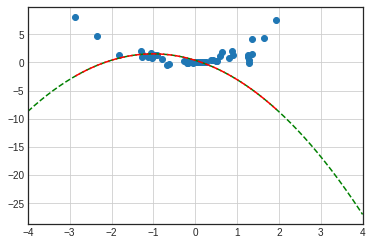

In [114]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*line_x**2 + b*line_x +c

x_ = np.arange(-4.0, 4.0, 0.001)
y_ = a*x_**2 + b*x_ + c

plt.scatter(X, Y, label='X data')
plt.plot(x_, y_, 'g--', label='original')
plt.plot(line_x, line_y, 'r--', label='before train')
plt.xlim(-4.0, 4.0)
plt.legend
plt.grid()
plt.show()

### Util Functions

In [115]:
def compute_loss():
  pred_y = X*(np.array(X)**2) + b*np.array(X) + c
  loss = tf.reduce_mean((Y-pred_y)**2)
  return loss

### Optimizer

In [108]:
optimizer= Adam(learning_rate=learning_rate)

### 학습

In [116]:
for epoch in range(1, epochs+1, 1):
  optimizer.minimize(compute_loss, var_list=[a,b,c])

  if epoch % 100 == 0:
    print('step: {:4d}\a: {:.4f}\tb: {:.4f}\tc: {:.4f}'.format(step, a.numpy(), b.numpy(), c.numpy()))

step:  999: -1.1394	b: -3.3961	c: 1.5084


step:  999: -1.1394	b: -3.3944	c: 1.5085


step:  999: -1.1394	b: -3.3944	c: 1.5085


step:  999: -1.1394	b: -3.3944	c: 1.5085


step:  999: -1.1394	b: -3.3944	c: 1.5085


step:  999: -1.1394	b: -3.3944	c: 1.5085


step:  999: -1.1394	b: -3.3944	c: 1.5085


step:  999: -1.1394	b: -3.3944	c: 1.5085


step:  999: -1.1394	b: -3.3944	c: 1.5085


step:  999: -1.1394	b: -3.3944	c: 1.5085


### 학습 후의 회귀선

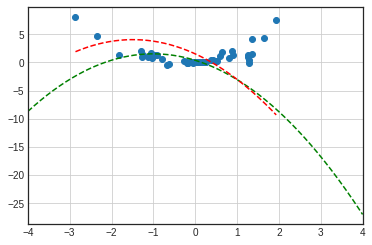

In [117]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*line_x**2 + b*line_x +c

plt.scatter(X, Y, label='X data')
plt.plot(x_, y_, 'g--', label='original')
plt.plot(line_x, line_y, 'r--', label='after train')
plt.xlim(-4.0, 4.0)
plt.legend
plt.grid()
plt.show()

## 로지스틱 회귀(Logistic Regression)
- 다항 분류, MNIST

### modules import

In [118]:
from tensorflow.keras.datasets import mnist

### 하이퍼 파라미터 (Hyper Parameter)


In [129]:
num_classes = 10
num_features = 784

learning_rate = 0.1
training_steps = 1000
batch_size = 256

### 데이터 로드

In [150]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

x_train, x_test = x_train / 255., x_test / 255

### tf.data API 사용
- 03 에서 다시 다룸 

In [151]:
trian_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
trian_data = trian_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

### 변수 지정

In [152]:
W = tf.Variable(tf.random.normal([num_features, num_classes]), name='weight')
b = tf.Variable(tf.zeros([num_classes]), name='bias')

### Util Functions

In [153]:
def logistic_regression(x):
  return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(pred_y, true_y):
  true_y = tf.one_hot(true_y, depth=num_classes)
  pred_y = tf.clip_by_value(pred_y, 1e-9, 1)

  return tf.reduce_mean(-tf.reduce_sum(true_y * tf.math.log(pred_y), 1))

def accuracy(y_pred, y_true):
  correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Optimizer

In [154]:
optimizer = tf.optimizers.SGD(learning_rate)

In [155]:
def run_optimization(x, y):
  with tf.GradientTape() as tape:
    pred = logistic_regression(x)
    loss = cross_entropy(pred, y)

  gradients = tape.gradient(loss, [W, b])

  optimizer.apply_gradients(zip(gradients, [W, b]))

### 학습 진행

In [156]:
for step, (batch_x, batch_y) in enumerate(trian_data.take(training_steps), 1):
  run_optimization(batch_x, batch_y)

  if step % 50 == 0:
    pred = logistic_regression(batch_x)
    loss = cross_entropy(pred, batch_y)
    acc = accuracy(pred, batch_y)
    print('step: {:4d}\tloss: {:.4f}\taccuracy: {:.4f}'.format(step, loss, acc))

step:   50	loss: 7.7214	accuracy: 0.2344
step:  100	loss: 4.4097	accuracy: 0.3672
step:  150	loss: 3.3672	accuracy: 0.4570
step:  200	loss: 2.8071	accuracy: 0.5703
step:  250	loss: 2.3668	accuracy: 0.6328
step:  300	loss: 1.7961	accuracy: 0.6523
step:  350	loss: 1.8398	accuracy: 0.6758
step:  400	loss: 1.5884	accuracy: 0.6992
step:  450	loss: 1.4489	accuracy: 0.7383
step:  500	loss: 1.6046	accuracy: 0.7188
step:  550	loss: 1.5945	accuracy: 0.6875
step:  600	loss: 1.5411	accuracy: 0.7031
step:  650	loss: 1.3616	accuracy: 0.7344
step:  700	loss: 0.8941	accuracy: 0.8125
step:  750	loss: 1.1816	accuracy: 0.7617
step:  800	loss: 1.2116	accuracy: 0.7344
step:  850	loss: 1.2721	accuracy: 0.7539
step:  900	loss: 0.9044	accuracy: 0.7969
step:  950	loss: 0.5587	accuracy: 0.8477
step: 1000	loss: 0.9239	accuracy: 0.7969


###  테스트

In [157]:
pred = logistic_regression(x_test)
print('Test Accuracy: {}'.format(accuracy(pred, y_test)))

Test Accuracy: 0.8108999729156494


### 시각화

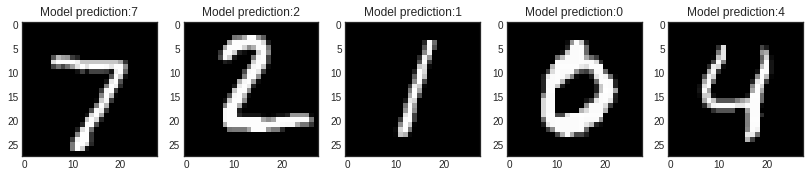

In [158]:
num_images =  5
test_images = x_test[:num_images]
predictions = logistic_regression(test_images)

plt.figure(figsize=(14, 8))
for i in range(1, num_images+1, 1):
  plt.subplot(1, num_images, i)
  plt.imshow(np.reshape(test_images[i-1], [28, 28]), cmap='gray')
  plt.title('Model prediction:{}'.format(np.argmax(predictions.numpy()[i-1])))
plt.show()